### LINK TO PERCEPTRON ON GITHUB: 

https://github.com/lucasf46/lucasf46.github.io/blob/main/posts/BlogPost3/perceptron.py

# INTRODUCTION:

The purpose of this blog post is to implement the perceptron algorithm and to understand how the algorithm runs with various types of data.
In this particular case, there are three types of data the perceptron runs on: linearly separable data, non-linearly separable data, and data with more than 2 features. The first way to visualize the effectiveness of the perceptron is to track the algorithms calculation of loss as it searches for an ideal weight vector. A second way is to see the actual classification line shift on top of the graphed data.

# PERCEPTRON GRAD:

The perceptron.grad function takes the feature matrix X and the target vector y as arguments. First, the function
computes the score for each element x in the data with a weight w. The value of y in this binary classification 
problem can be either -1 or 1. Therefore, within the function's return statement, the predicted score of the ith element 
is multiplied the yi which is the true label of that ith element. If the value is less than 0, that means the predicted
and actual values are different, indicating a misclassification. Multiplying that result by the product of X and y
sets the elements corresponding to misclassified samples to their original values, while setting the correctly classified
elements to zero.

# Part A: Implement Perceptron

In [946]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [947]:
import torch
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
torch.manual_seed(1234)

In [948]:
def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

In [949]:
X, y = perceptron_data(n_points = 300, noise = 0.2)

In [950]:
def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

In [951]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

The plot_data and draw_line functions were borrowed from the lecture notes related to the perceptron implementation.

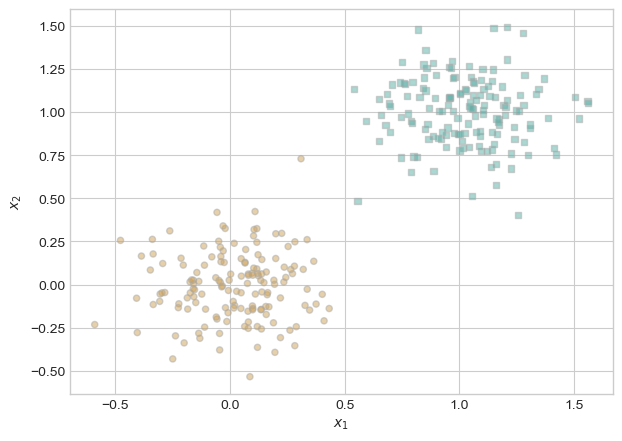

In [952]:
fig, ax = plt.subplots(1, 1)
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)

Here we can visualize the data on which our Perceptron algorithm will run. 

## Check Implementation:

In [970]:
# instantiate a model and an optimizer
testp = Perceptron() 
testopt = PerceptronOptimizer(testp)

testloss = 1.0

# for keeping track of loss values
testloss_vec = []

testn = X.size()[0]

#while loss > 0: # dangerous -- only terminates if data is linearly separable
while testloss > 0:

    testloss = testp.loss(X, y) 
    testloss_vec.append(testloss)

    # pick a random data point
    testi = torch.randint(testn, size = (1,))
    testx_i = X[[testi],:]
    testy_i = y[testi]
                
    # perform a perceptron update using the random data point
    testopt.step(testx_i, testy_i)

print("Perceptron loss: ", testloss)

Perceptron loss:  tensor(0.)


At the moment, without any further experimentation or testing, our implementation of the Perceptron is "probably" working because our calculated loss = 0.

# PART B: EXPERIMENTS

## Experiment 1: Linearly Separable Data

Our first experiment involves the data shown earlier. It is linearly separable so we expect that our algorithm will converge with the loss value = 0.

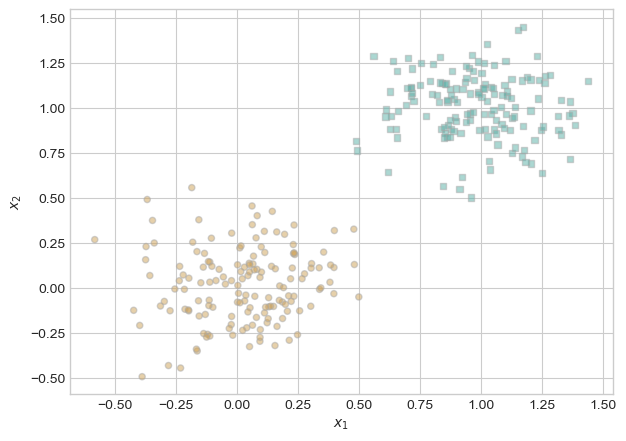

In [954]:
fig, ax = plt.subplots(1, 1)
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)

In [975]:
# instantiate a model and an optimizer
torch.manual_seed(1234567)
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# Initializing iteration counts
max_iterations = 100
iterations = 0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

loss_threshold = 0.001

#while loss > 0: # dangerous -- only terminates if data is linearly separable
while iterations < max_iterations:
    # not part of the update: just for tracking our progress 

    # if loss is close enough to 0, given a certain threshold, treat it as though the perceptron converged to exactly 0
    if (loss < loss_threshold):
        break

    loss = p.loss(X, y) 
    loss_vec.append(loss)

    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

    # increment iterations
    iterations += 1

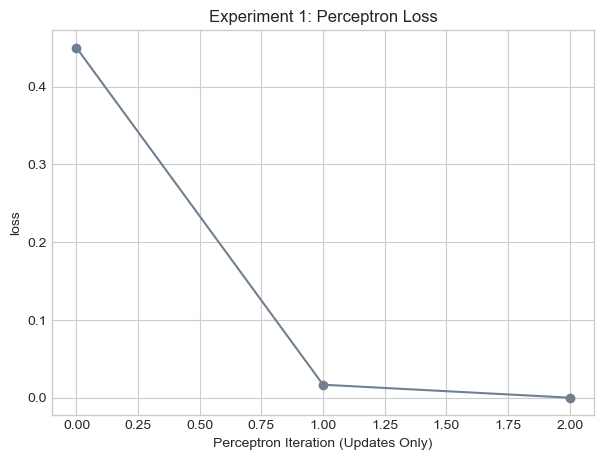

In [976]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss", title = "Experiment 1: Perceptron Loss")

Here, we can visualize the Perceptrons accuracy for each iteration as it ultimately converges on a loss of 0. 

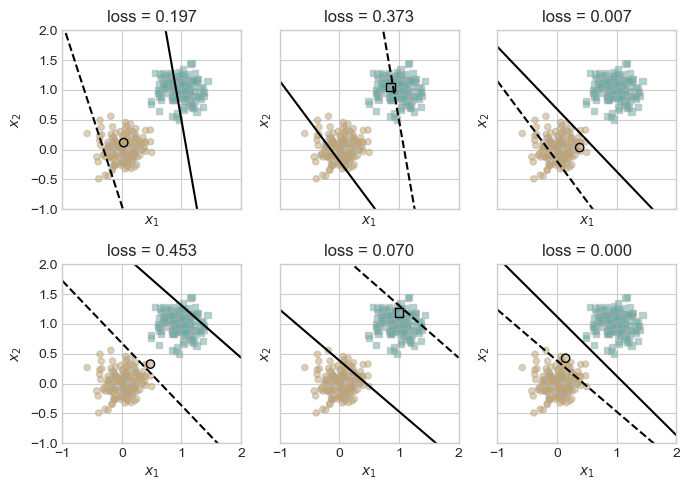

In [957]:
# initialize a perceptron 
p1 = Perceptron()
opt1 = PerceptronOptimizer(p1)
p1.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []

while loss > 0:

    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p1.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 

    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    local_loss = opt1.step(x_i, y_i)

    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0:
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p1.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(p1.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = markers[marker_map[y[i].item()]])
        # draw_line(w, -10, 10, ax, color = "black")
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
plt.tight_layout()

Here, we can visualize the Perceptron finding a decision boundary that fully separates the data. The solid black line represents the current decision boundary while the dotted black line represents the previous decision boundary. 

## Experiment 2: Non-linearly Separable Data

We can then experiment with how the Perceptron algorithm runs on data that is NOT linearly separable. To produce non-linearly separable data, we just need to modify the percpetron_data and plot_perceptron_data function by adjusting the noise parameter.  

In [958]:
def new_perceptron_data(n_points = 300, noise = 0.5, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

In [959]:
X, y = new_perceptron_data(n_points = 300, noise = 0.5)

In [960]:
def plot_new_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

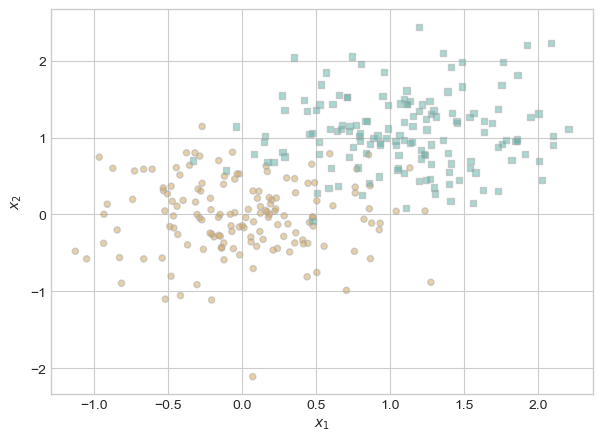

In [961]:
fig, ax = plt.subplots(1, 1)
X, y = new_perceptron_data()
plot_new_perceptron_data(X, y, ax)

This new_perceptron_data is not linearly separable. Therefore, we expect the perceptron algorithm to not find a weight vector such that the loss is minimized to 0. The perceptron is run with this new_perceptron_data in the same way as before with the linearly separable data.

In [962]:
# instantiate a model and an optimizer
p1 = Perceptron() 
opt1 = PerceptronOptimizer(p1)

loss = 1.0

max_iterations = 1000
iterations = 0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

loss_threshold = 0.01

#while loss > 0: # dangerous -- only terminates if data is linearly separable
while iterations < max_iterations:
    # not part of the update: just for tracking our progress 

    if (loss < loss_threshold):
        break

    loss = p1.loss(X, y) 
    loss_vec.append(loss)

    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    opt1.step(x_i, y_i)

    iterations += 1

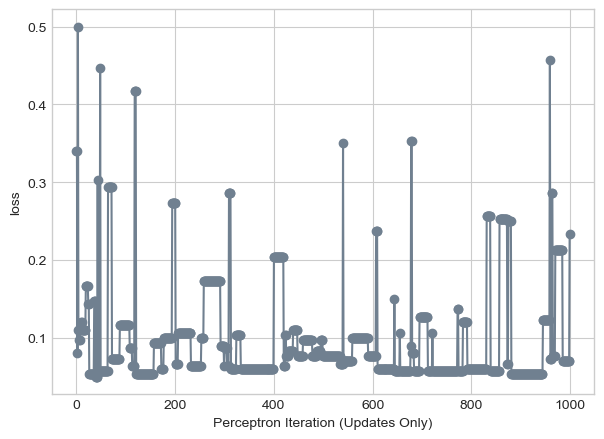

In [963]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss", title = "Experiment 2: Perceptron Loss")

Here, we can see that unlike the linearly separable plot, the perceptron runs until the max number of iterations is reached without converging on a loss of 0 and achieving perfect accuracy. 

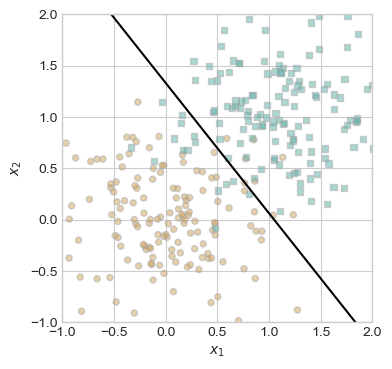

In [964]:
torch.manual_seed(1234567)

# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

loss_vec = []

iterations = 0

while iterations < 1000:

    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    local_loss = opt.step(x_i, y_i)

    loss = p.loss(X, y).item()
    loss_vec.append(loss)
    iterations += 1

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_new_perceptron_data(X, y, ax)
draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")      
       

This is the decision boundary after 1000 iterations of the algorithm on the non-linearly separable data. It is close, but the loss is still above 0 at 0.0733

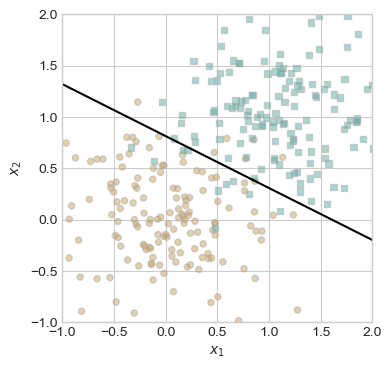

In [965]:
torch.manual_seed(12345)

# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

loss_vec = []

iterations = 0

while iterations < 2000:

    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    local_loss = opt.step(x_i, y_i)

    loss = p.loss(X, y).item()
    loss_vec.append(loss)
    iterations += 1

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_new_perceptron_data(X, y, ax)
draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")   

This is the decision boundary after another 2000 iterations of the algorithm on the non-linearly separable data. It is closer, but the loss is still above 0 at 0.0533

## Experiment 3: Beyond 2 Dimensions

We can generate perceptron data with 5 features (dimensions) by adjusting the p_dims argument in the perceptron_data function we've been using. 

In [966]:
def five_dimension_perceptron_data(n_points = 300, noise = 0.2, p_dims = 5):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

In [967]:
X, y = five_dimension_perceptron_data(n_points = 300, noise = 0.2)

In [968]:
# instantiate a model and an optimizer
torch.manual_seed(1234567)
p3 = Perceptron() 
opt3 = PerceptronOptimizer(p3)

loss = 1.0

max_iterations = 100
iterations = 0

# for keeping track of loss values
loss_vec3 = []

n = X.size()[0]

loss_threshold = 0.001

#while loss > 0: # dangerous -- only terminates if data is linearly separable
while iterations < max_iterations:
    # not part of the update: just for tracking our progress 

    if (loss < loss_threshold):
        break

    loss = p3.loss(X, y) 
    loss_vec3.append(loss)

    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
                
    # perform a perceptron update using the random data point
    opt3.step(x_i, y_i)

    iterations += 1
print("Perceptron Loss: ", loss)

Perceptron Loss:  tensor(0.)


We can see the running the perceptron on the five-dimensional data yields a loss of 0, indicating the data is also linearly separable. Let's look at the visualization of the loss value after each iteration to confirm.

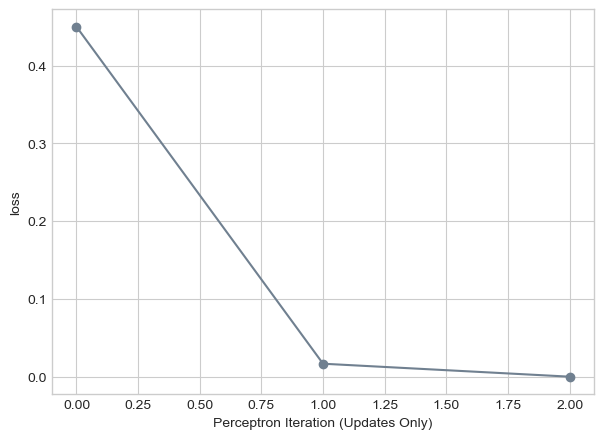

In [969]:
plt.plot(loss_vec3, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec3)), loss_vec3, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss", title = "Experiment 3: Perceptron Loss")

Based on the graph, the perceptron on data with 3+ dimensions converged, finding a weight vector such that the loss value is minimized to 0, therefore the data is linearly separable. 

The runtime complexity of the perceptron algorithm is O(n * d) where n is the number of data points.

# ABSTRACT